## 1.패션Mnist
- https://www.tensorflow.org/tutorials/keras/classification?hl=ko

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:
-패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

여기에서 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가합니다. TensorFlow에서 직접 Fashion MNIST에 액세스할 수 있습니다. TensorFlow에서 직접 Fashion MNIST 데이터를 가져오고 로드합니다.

In [52]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [53]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 2.데이터탐색
- 모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다

In [55]:
train_images.shape

(60000, 28, 28)

In [56]:
len(train_labels)

60000

In [57]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


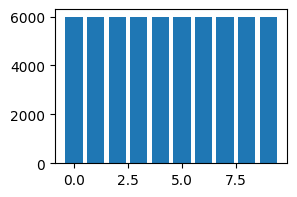

In [58]:
## 추가코드
def label_Unique(data):
  tmp=np.unique(data, return_counts=True)
  print(tmp)
  plt.figure(figsize=(3,2))
  plt.bar(tmp[0],tmp[1])
  plt.show()
label_Unique(train_labels)


In [59]:
test_images.shape


(10000, 28, 28)

In [60]:
len(test_labels)

10000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


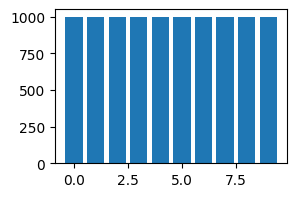

In [61]:
###########
## 추가코드
############
label_Unique(test_labels)

## 3.데이터전처리
- 네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

In [62]:
# 민맥스값 확인
# 정규화 되어있지않음을 볼수있다.
train_images[0].min(),train_images.max()

(0, 255)

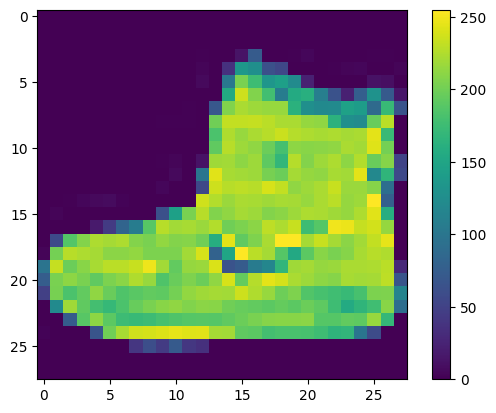

In [63]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [64]:
###########################3
## 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다.
# 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

train_images = train_images / 255.0
test_images = test_images / 255.0

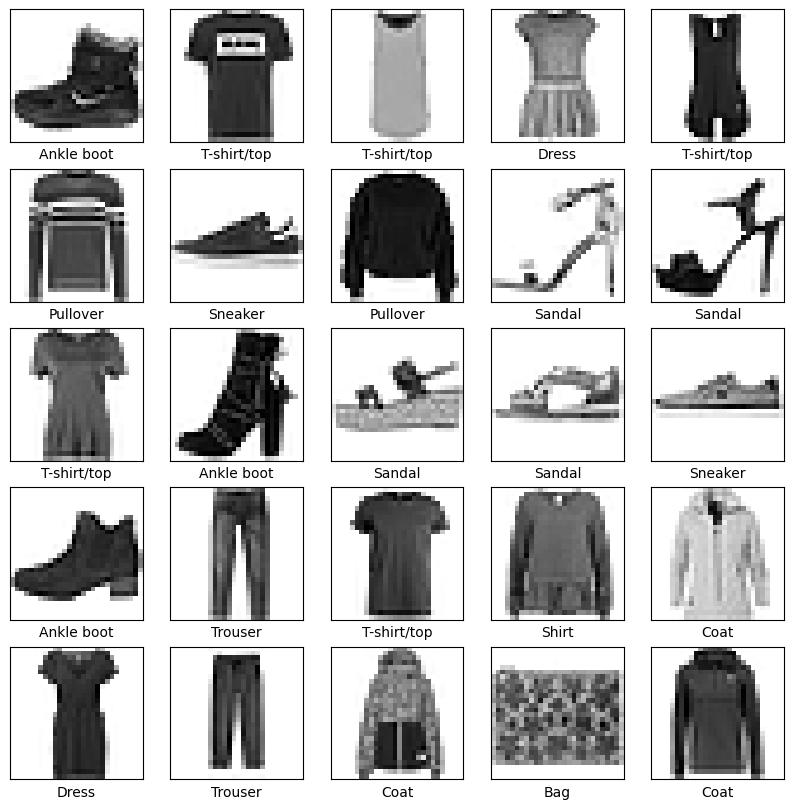

In [65]:
############################3
## 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠.
### 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4.모델구성
- 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.
.


784개의 x가있으면 w 784개 + b 1개 => 785

128개이므로 129*10=>1290

In [66]:
########################

# 층 설정
# 신경망의 기본 빌딩 블록은 레이어 입니다.
# 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.
# 대부분 딥러닝은 간단한 층을 연결하여 구성됩니다.
# tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다

# 1,28,28 입력자료를 흑백이여야함
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #입력사이즈는 28,28을 넣으면 모델에서 알아서 flatten하면서 784로 만듦
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) # 반드시 softmax함수를 사용해야함. 원핫인코딩 되어있어야함, 여기에 사용하지 않으면 모델컴파일 loss에 사용하면 됨
])
#

#############
# 모델 컴파일
# 모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됩니다.

# 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
# 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
# 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

model.compile(optimizer='adam',
              #원핫인코딩을 컴파일 하면서하자, 함수를 알아서하자 from_logits=True
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #원핫인코딩을 컴파일하면서 하자
              metrics=['accuracy'])




In [67]:
#########
## 모델저장
### batch사이즈 지정안하면 기본적으로 32개씩
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

hist=model.fit(train_images, train_labels,
               epochs=10,
               validation_data=(test_images, test_labels),callbacks=[checkpointer],
               verbose=0) # vebose=1이 기본이고, 실행결과 보여주는 옵션, 0은 결과 생략



Epoch 1: saving model to ./model/01-0.8459.hdf5

Epoch 2: saving model to ./model/02-0.8529.hdf5

Epoch 3: saving model to ./model/03-0.8668.hdf5

Epoch 4: saving model to ./model/04-0.8706.hdf5

Epoch 5: saving model to ./model/05-0.8589.hdf5

Epoch 6: saving model to ./model/06-0.8787.hdf5

Epoch 7: saving model to ./model/07-0.8808.hdf5

Epoch 8: saving model to ./model/08-0.8764.hdf5

Epoch 9: saving model to ./model/09-0.8768.hdf5

Epoch 10: saving model to ./model/10-0.8815.hdf5


## 5.정확도평가
* 다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다.
* 만들어진 모델의 레이어당 w,b를 이용한 계산결과의 최종값이 test_label값과 같은가 (그갯수를 파악하고 / 전체갯수)
* 지금 이 자료는 10개의 카테고리중 한개 카테고리 맞추기(softmax활성화 함수: wx+b를 하고 시그모이드를 한 10개의 값을 다 더해서 각 값을 나눈값)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model('/content/model/10-0.8816.hdf5')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3420 - accuracy: 0.8816 - 696ms/epoch - 2ms/step

Test accuracy: 0.881600022315979


## 6.예측하기
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.
- y값을 원핫인코딩해서 넣으면 model.predict하면 됨
- y값을 원핫인코딩 안하고 넣으면 model.predict하면 안됨
tf.nn.softmax해야함.

==> 이코드의 이슈는 최종레이어의 softmax함수를 사용하지 않았기 때문에 예측할때 아래코드가 추가되어야함

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [77]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


[1.71104077e-07 1.66877250e-08 5.40202683e-09 2.37942399e-09
 3.75533276e-08 5.36297448e-04 1.28646207e-07 2.01025456e-02
 1.16854935e-08 9.79360759e-01] 1.0
----------------------------------------------------------------------------------------------------
yhat Sandal ...real: 7


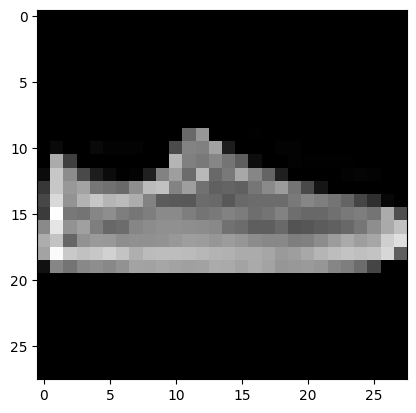

In [96]:
## 테스트이미지의 첫번째 자료를 확인하고자함
print(predictions[0], np.sum(predictions[0])) # 값의 정확도가 맞는지 확인
print('-'*100)
bun= np.argmax(predictions[12])  #
yhat = class_names[bun]

print('yhat',yhat,'...real:',test_labels[12])
plt.imshow(test_images[12], cmap='gray')

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째 예측값의 정확도와 클래스 이름 출력
print(predictions[0], np.sum(predictions[0]))
print('-'*100)
bun = np.argmax(predictions[0])
yhat = class_names[bun]

print('Predicted:', yhat, '...Actual:', class_names[test_labels[0]])

# 예측값과 실제 라벨이 일치하지 않는 경우의 리스트 생성 및 출력
mismatches = []
for i in range(len(test_images)):
    if np.argmax(predictions[i]) != test_labels[i]:
        mismatches.append(i)
print('-'*100)
print("Indexes of mismatched predictions:", mismatches)
print('-'*100)
print('갯수',len(mismatches))

[1.71104077e-07 1.66877250e-08 5.40202683e-09 2.37942399e-09
 3.75533276e-08 5.36297448e-04 1.28646207e-07 2.01025456e-02
 1.16854935e-08 9.79360759e-01] 1.0
----------------------------------------------------------------------------------------------------
Predicted: Ankle boot ...Actual: Ankle boot
----------------------------------------------------------------------------------------------------
Indexes of mismatched predictions: [12, 17, 23, 25, 29, 40, 42, 49, 51, 67, 68, 89, 98, 107, 127, 135, 147, 150, 151, 153, 166, 172, 183, 192, 239, 241, 244, 247, 315, 316, 324, 325, 359, 361, 364, 378, 381, 382, 396, 406, 409, 441, 444, 452, 454, 457, 460, 474, 475, 491, 512, 526, 529, 541, 548, 562, 563, 565, 569, 572, 577, 586, 595, 628, 634, 635, 639, 663, 664, 669, 670, 688, 689, 697, 711, 722, 725, 732, 737, 751, 753, 760, 761, 779, 787, 793, 800, 801, 805, 823, 830, 851, 860, 881, 902, 905, 907, 909, 921, 930, 935, 937, 938, 953, 956, 960, 965, 966, 971, 976, 977, 979, 985, 994, 100

In [75]:
predictions[0] ,np.sum(predictions[0])

(array([1.71104077e-07, 1.66877250e-08, 5.40202683e-09, 2.37942399e-09,
        3.75533276e-08, 5.36297448e-04, 1.28646207e-07, 2.01025456e-02,
        1.16854935e-08, 9.79360759e-01], dtype=float32),
 1.0)

In [76]:
tmp=model.predict(test_images) ## 원핫인코딩으로 되어있는 y값을 넣었을때는 이렇게 예측함
tmp[0], np.sum(tmp[0])

313/313 [==============================] - 0s 1ms/step


(array([-10.9489975, -13.276596 , -14.404495 , -15.224411 , -12.4655075,
         -2.8988256, -11.234204 ,   0.7250873, -13.632921 ,   4.6111407],
       dtype=float32),
 -88.74973)

In [108]:
# 추가 - 직접 계산하는 정확도
# 위의 예측하는 방법을 이용하면 정확도를 직접 구할 수있음
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('-'*100)

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print('----------직접 계산한 정확도--------')
yhat =np.argmax(predictions,axis=1)
um_correct = np.sum(yhat == test_labels)
um_correct/len(test_labels)

313/313 - 0s - loss: 0.3420 - accuracy: 0.8816 - 326ms/epoch - 1ms/step
----------------------------------------------------------------------------------------------------
313/313 [==============================] - 0s 1ms/step
----------직접 계산한 정확도--------


0.8816

In [22]:
#####################33
## 이 예측은 10개의 숫자 배열로 나타납니다.
### 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.
## 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

np.argmax(predictions[0])

9

In [23]:
#10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

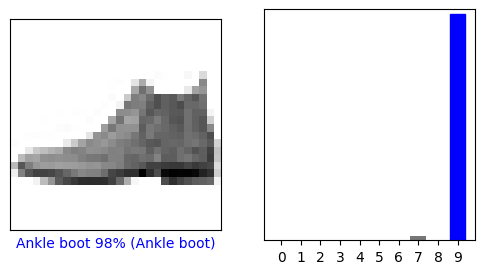

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

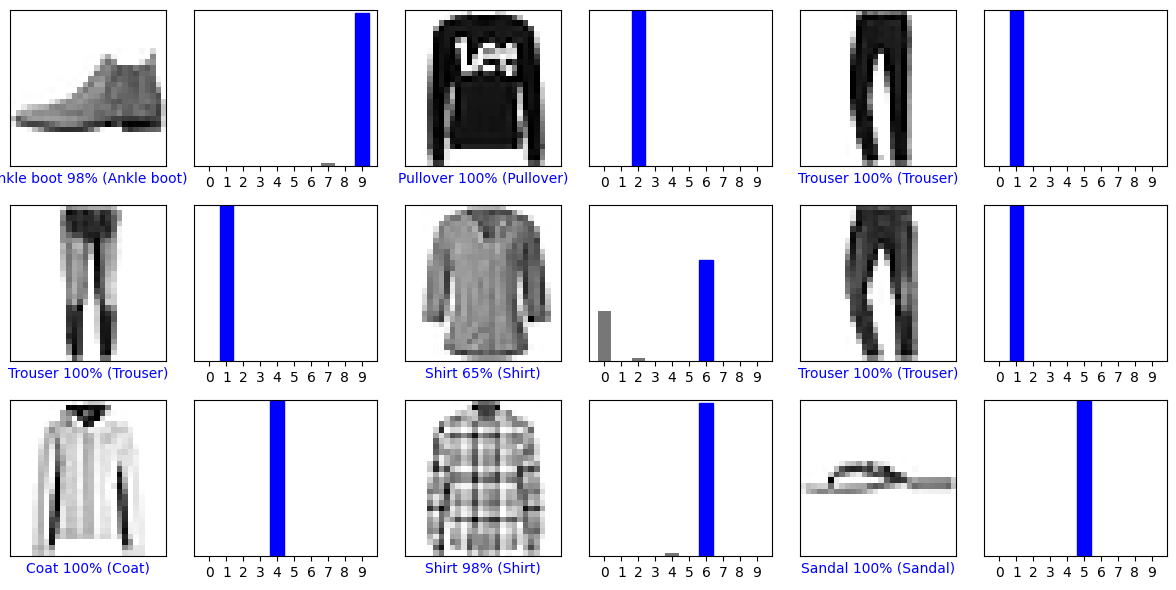

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

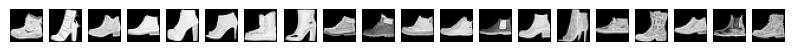

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# fashion_mnist 데이터셋 로드
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# '9' 클래스 (앵클 부츠)에 해당하는 이미지 필터링
is_class_9 = train_labels == 9
class_9_images = train_images[is_class_9][:20]  # 처음 20개 이미지 선택

# 이미지 시각화
plt.figure(figsize=(10, 10))
for i, image in enumerate(class_9_images):
    plt.subplot(1, 20, i + 1)  # 4행 5열의 그리드에서 i+1번째 위치에 이미지 표시
    plt.imshow(image, cmap='gray')  # 흑백 컬러맵 사용
    plt.axis('off')  # 축 표시 제거
plt.show()


In [27]:
indices_of_9 = [i for i, label in enumerate(train_labels) if label ==9 ]
sample = indices_of_9[:20]

img = np.stack(train_images[ sample])
plt.show()

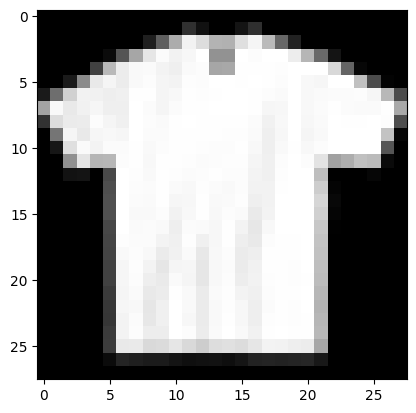

In [28]:
from PIL import Image
img=Image.open('/content/sample_data/다운로드.jpg').resize((28,28)).convert('L')
img=255-np.array(img)
img=img/255.

newimg=np.reshape(img,(1,28,28))
plt.imshow(img, cmap='gray')


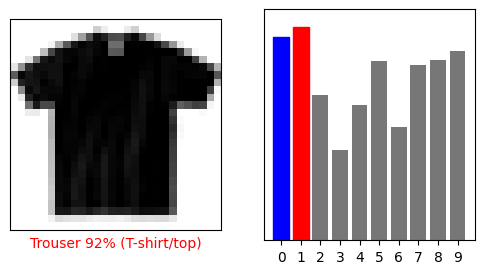

In [38]:
# 더미 예측 및 라벨 생성
predictions = np.random.rand(1, 10) # 10개 클래스에 대한 더미 예측 확률
test_labels = np.array([0]) # 실제 라벨 예시
test_images = np.array([newimg.reshape(28, 28)]) # 위에서 처리한 이미지

# 시각화
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0, predictions[0], test_labels, newimg)
plt.subplot(1,2,2)
plot_value_array(0, predictions[0], test_labels)
plt.show()


Text(0.5, 0, 'Epochs')

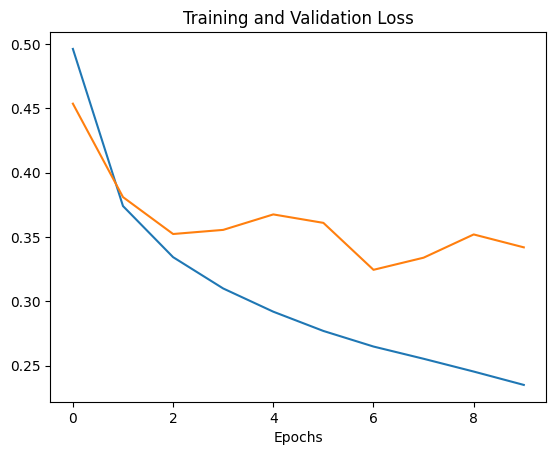

In [30]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

In [31]:
hist.history

{'loss': [0.49609658122062683,
  0.3740345239639282,
  0.33433401584625244,
  0.3100087344646454,
  0.29196953773498535,
  0.27700546383857727,
  0.2648959755897522,
  0.2553941011428833,
  0.24546854197978973,
  0.2350832223892212],
 'accuracy': [0.8266333341598511,
  0.8643500208854675,
  0.8771833181381226,
  0.8867499828338623,
  0.8919833302497864,
  0.8963333368301392,
  0.9025499820709229,
  0.9043833613395691,
  0.9083166718482971,
  0.9133333563804626],
 'val_loss': [0.453564316034317,
  0.38099363446235657,
  0.3523176312446594,
  0.3555217385292053,
  0.3675364851951599,
  0.3609680235385895,
  0.3245042860507965,
  0.33392244577407837,
  0.3519768714904785,
  0.34195202589035034],
 'val_accuracy': [0.8467000126838684,
  0.8644000291824341,
  0.8740000128746033,
  0.8707000017166138,
  0.8687000274658203,
  0.8701000213623047,
  0.8844000101089478,
  0.8798999786376953,
  0.8718000054359436,
  0.881600022315979]}